# Simulation of 1D Ising Model

## The method is from paper 2004 1D Ising Model

### Method 1: Combination of Classical and Quantum Algorithm

In [1]:
import numpy as np
import random
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import matplotlib.pyplot as plt
from time import time

In [22]:
# Set Parameters
J = 1 # Coupling Strength
T = 1 # Temperature

# Calculate the Possibility
P = np.exp(-4 * J / T)

# Initialize the spins. This might be able to performed through quantum algorithms.
n = 5
spins = [1, -1, 1, -1, 1]
# This is a test with definite answer (probability will not be referred to when flipping. The answer should be [-1,1,-1,1,-1])

# Initialize the circuit
q = QuantumRegister(5)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

"""
For every loop, the program takes 3 spins from position i-1, i, and i+1 of the spins list. The program will then apply the Ising 
interaction on the spin at position i. After the ising interaction, the update spins is stored back to the spins list. The same 
process then repeated. If we don't consider the 1-dimensional ising model to be arranged in a circular shape (that is, the head spin
is not in neighbour with the tail spin), the program will apply ising interaction on all the spins except the first one and the last one.
"""


"""
In the following code, q[0] represents the spin i, q[1] represents the spins i-1, q[2] represents the spins i+1,
q[3] stands for the scratch qubit which will always be |0>, and q[4] represents the possibility to flip if change in energy is positive.
"""
for i in range (0, len(spins)):
    # Set the scratch and possibility qubits
    qc.reset(q[3])
    qc.reset(q[4])
    qc.u(2 * np.arccos(np.sqrt(1 - P)), 0, 0, q[4])
    
    #Set up the qubits
    if spins[i] == 1:
        qc.x(q[0])
    else:
        qc.reset(q[0])
    
    if spins[i - 1] == 1:
        qc.x(q[1])
    else:
        qc.reset(q[1])
    
    if spins[(i + 1) % len(spins)] == 1:
        qc.x(q[2])
    else:
        qc.reset(q[2])
    
    # Apply Ising Interaction (In a 'conservative' way, the code can be modified to be more efficient)
    # Operation 1
    qc.mcx([q[0], q[1], q[2]], q[3]) 
    
    #Operation 2
    for j in range(3):
        qc.x(q[j])
    qc.mcx([q[0], q[1], q[2]], q[3])
    for j in range(3):
        qc.x(q[j])
    
    # Operation 3
    qc.x(q[3])
    qc.cx(q[3], q[0])
    qc.x(q[3])
    
    # Operation 4
    qc.ccx(q[4], q[3], q[0])
    
    # Measurement
    qc.measure(q[0], c)
    backend = Aer.get_backend('qasm_simulator')
    shots = 1024
    results = execute(qc, backend, shots=shots).result()
    counts = results.get_counts()
    
    # Update spin i
    if len(counts.keys()) == 1:
        newstat = int(list(counts.keys())[0])
    else:
        if list(counts.values())[0] > list(counts.values())[1]:
            newstat = int(list(counts.keys())[0])
        else:
            newstat = int(list(counts.keys())[1])
    if newstat == 1:
        spins[i] = 1
    elif newstat == 0:
        spins[i] = -1
    
    for j in range(5):
        qc.reset(q[j])

print(spins)

[-1, 1, -1, 1, -1]


### Comparison of Classical 1D Ising Model and with Classic + Quantum Method

#### Traditional Method (in random order)

6.7978198528289795 seconds
{'[1, 1, 1, 1]': 119, '[1, 1, 1, -1]': 52, '[1, 1, -1, 1]': 49, '[1, 1, -1, -1]': 60, '[1, -1, 1, 1]': 63, '[1, -1, 1, -1]': 33, '[1, -1, -1, 1]': 49, '[1, -1, -1, -1]': 50, '[-1, 1, 1, 1]': 65, '[-1, 1, 1, -1]': 71, '[-1, 1, -1, 1]': 28, '[-1, 1, -1, -1]': 65, '[-1, -1, 1, 1]': 64, '[-1, -1, 1, -1]': 68, '[-1, -1, -1, 1]': 61, '[-1, -1, -1, -1]': 103}


([<matplotlib.axis.XTick at 0x1e4865c5fa0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

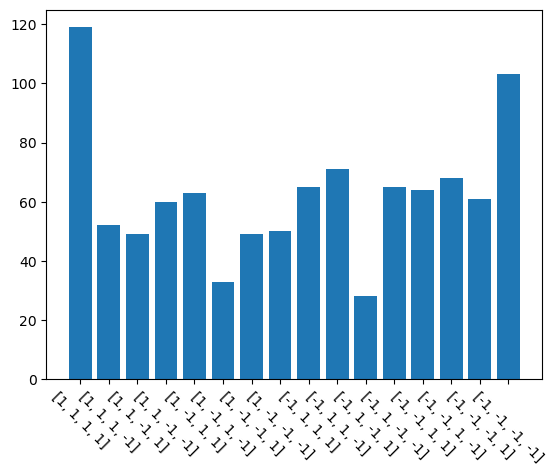

In [20]:
N = 4
J = -0.25*np.log(0.5)
T = 1

def energy(spin, J):
    E = 0
    for i in range(0, len(spin)):
        E += spin[i-1] * spin[i]
    E = -J * E
    return E

def deltaE(spin, ind, J):
    temp = spin.copy()
    temp[ind] = temp[ind] * (-1)
    dE = energy(temp, J) - energy(spin, J)
    return dE

dyct = {'[1, 1, 1, 1]':0, '[1, 1, 1, -1]':0, '[1, 1, -1, 1]':0, '[1, 1, -1, -1]':0,
       '[1, -1, 1, 1]':0, '[1, -1, 1, -1]':0, '[1, -1, -1, 1]':0, '[1, -1, -1, -1]':0,
       '[-1, 1, 1, 1]':0, '[-1, 1, 1, -1]':0, '[-1, 1, -1, 1]':0, '[-1, 1, -1, -1]':0,
       '[-1, -1, 1, 1]':0, '[-1, -1, 1, -1]':0, '[-1, -1, -1, 1]':0, '[-1, -1, -1, -1]':0,}

start = time()
for j in range(1000):
    
    spins = [1, 1, 1, 1]
    
    for i in range (1000):
        index = random.randint(0, N-1)
        if deltaE(spins, index, J) <= 0 or ((deltaE(spins, index, J) > 0 and random.random() < np.exp(-deltaE(spins, index, J)/T))):
            spins[index] = spins[index] * (-1)
    dyct[str(spins)] = dyct[str(spins)] + 1

print(float(time() - start), 'seconds')
print(dyct)
plt.bar(dyct.keys(), dyct.values())
plt.xticks(ticks = list(dyct.keys()), rotation = 315)

#### Classic + Quantum Method (in random order)

In [3]:
def randomindex():
    tempq = QuantumRegister(2)
    tempc = ClassicalRegister(2)
    circ = QuantumCircuit(tempq, tempc)
    circ.h(tempq[0])
    circ.h(tempq[1])
    circ.measure(tempq, tempc)
    backend = Aer.get_backend('qasm_simulator')
    shots = 1024
    results = execute(circ, backend, shots=shots).result()
    counts = results.get_counts()
    
    if list(counts.keys())[0] == '00':
        return 0
    elif list(counts.keys())[0] == '01':
        return 1
    elif list(counts.keys())[0] == '10':
        return 2
    elif list(counts.keys())[0] == '11':
        return 3

12014.936329126358 seconds
{'[1, 1, 1, 1]': 124, '[1, 1, 1, -1]': 53, '[1, 1, -1, 1]': 63, '[1, 1, -1, -1]': 62, '[1, -1, 1, 1]': 61, '[1, -1, 1, -1]': 37, '[1, -1, -1, 1]': 43, '[1, -1, -1, -1]': 50, '[-1, 1, 1, 1]': 57, '[-1, 1, 1, -1]': 55, '[-1, 1, -1, 1]': 25, '[-1, 1, -1, -1]': 61, '[-1, -1, 1, 1]': 71, '[-1, -1, 1, -1]': 50, '[-1, -1, -1, 1]': 63, '[-1, -1, -1, -1]': 125}


([<matplotlib.axis.XTick at 0x1e486b48ac0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

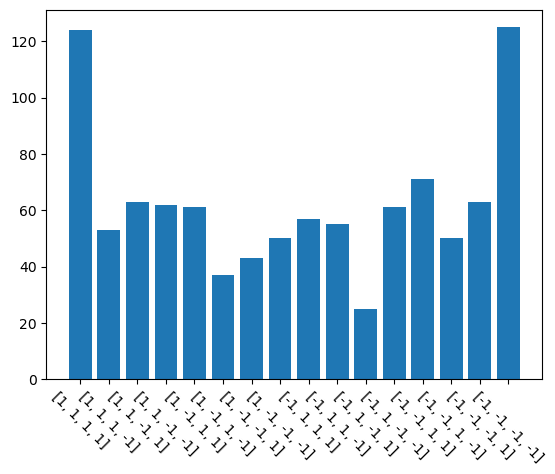

In [30]:
start = time()
dyct = {'[1, 1, 1, 1]':0, '[1, 1, 1, -1]':0, '[1, 1, -1, 1]':0, '[1, 1, -1, -1]':0,
       '[1, -1, 1, 1]':0, '[1, -1, 1, -1]':0, '[1, -1, -1, 1]':0, '[1, -1, -1, -1]':0,
       '[-1, 1, 1, 1]':0, '[-1, 1, 1, -1]':0, '[-1, 1, -1, 1]':0, '[-1, 1, -1, -1]':0,
       '[-1, -1, 1, 1]':0, '[-1, -1, 1, -1]':0, '[-1, -1, -1, 1]':0, '[-1, -1, -1, -1]':0,}

# Set Parameters
J = -0.25*np.log(0.5) # Coupling Strength
T = 1 # Temperature

# Calculate the Possibility
P = np.exp(-4 * J / T)


# Initialize the circuit
q = QuantumRegister(5)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

"""
For every loop, the program takes 3 spins from position i-1, i, and i+1 of the spins list. The program will then apply the Ising 
interaction on the spin at position i. After the ising interaction, the update spins is stored back to the spins list. The same 
process then repeated. If we don't consider the 1-dimensional ising model to be arranged in a circular shape (that is, the head spin
is not in neighbour with the tail spin), the program will apply ising interaction on all the spins except the first one and the last one.
"""


"""
In the following code, q[0] represents the spin i, q[1] represents the spins i-1, q[2] represents the spins i+1,
q[3] stands for the scratch qubit which will always be |0>, and q[4] represents the possibility to flip if change in energy is positive.
"""

n = 4

for t in range(1000):
    
    spins = [1, 1, 1, 1]
    
    for i in range (1000):
        
        index = randomindex()
        
        qc = QuantumCircuit(q, c)
        
        qc.u(2 * np.arccos(np.sqrt(1 - P)), 0, 0, q[4])

        if spins[index] == 1:
            qc.x(q[0])
            
        if spins[index - 1] == 1:
            qc.x(q[1])

        if spins[(index + 1) % len(spins)] == 1:
            qc.x(q[2])

        # Operation 1
        qc.mcx([q[0], q[1], q[2]], q[3]) 

        for j in range(3):
            qc.x(q[j])
        qc.mcx([q[0], q[1], q[2]], q[3])
        for j in range(3):
            qc.x(q[j])

        qc.x(q[3])
        qc.cx(q[3], q[0])
        qc.x(q[3])

        qc.ccx(q[4], q[3], q[0])

        qc.measure(q[0], c)
        backend = Aer.get_backend('qasm_simulator')
        shots = 1024
        results = execute(qc, backend, shots=shots).result()
        counts = results.get_counts()

        if len(counts.keys()) == 1:
            newstat = int(list(counts.keys())[0])
        else:
            if list(counts.values())[0] > list(counts.values())[1]:
                newstat = int(list(counts.keys())[0])
            else:
                newstat = int(list(counts.keys())[1])
        if newstat == 1:
            spins[index] = 1
        elif newstat == 0:
            spins[index] = -1
    

    dyct[str(spins)] = dyct[str(spins)] + 1

print(float(time() - start), 'seconds')
print(dyct)
plt.bar(dyct.keys(), dyct.values())
plt.xticks(ticks = list(dyct.keys()), rotation = 315)

#### Traditional Method (in fixed order)

0.014513015747070312 seconds
{'[1, 1, 1, 1]': 56, '[1, 1, 1, -1]': 59, '[1, 1, -1, 1]': 0, '[1, 1, -1, -1]': 147, '[1, -1, 1, 1]': 0, '[1, -1, 1, -1]': 0, '[1, -1, -1, 1]': 0, '[1, -1, -1, -1]': 237, '[-1, 1, 1, 1]': 0, '[-1, 1, 1, -1]': 0, '[-1, 1, -1, 1]': 0, '[-1, 1, -1, -1]': 0, '[-1, -1, 1, 1]': 0, '[-1, -1, 1, -1]': 0, '[-1, -1, -1, 1]': 0, '[-1, -1, -1, -1]': 501}


([<matplotlib.axis.XTick at 0x16e3d1b5af0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

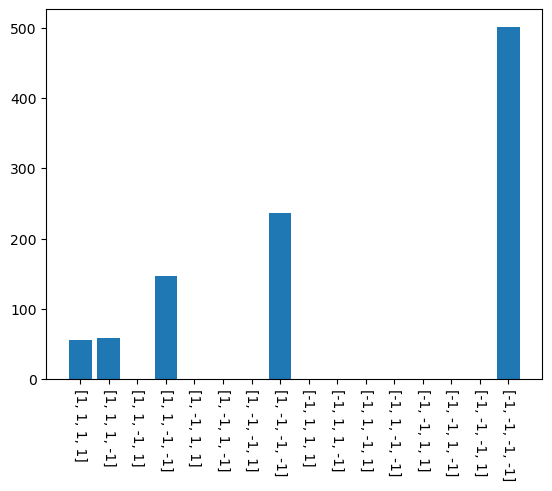

In [27]:
N = 4
J = -0.25*np.log(0.5)
T = 1

def energy(spin, J):
    E = 0
    for i in range(0, len(spin)):
        E += spin[i-1] * spin[i]
    E = -J * E
    return E

def deltaE(spin, ind, J):
    temp = spin.copy()
    temp[ind] = temp[ind] * (-1)
    dE = energy(temp, J) - energy(spin, J)
    return dE

start = time()
dyct = {'[1, 1, 1, 1]':0, '[1, 1, 1, -1]':0, '[1, 1, -1, 1]':0, '[1, 1, -1, -1]':0,
       '[1, -1, 1, 1]':0, '[1, -1, 1, -1]':0, '[1, -1, -1, 1]':0, '[1, -1, -1, -1]':0,
       '[-1, 1, 1, 1]':0, '[-1, 1, 1, -1]':0, '[-1, 1, -1, 1]':0, '[-1, 1, -1, -1]':0,
       '[-1, -1, 1, 1]':0, '[-1, -1, 1, -1]':0, '[-1, -1, -1, 1]':0, '[-1, -1, -1, -1]':0,}

for j in range(1000):
    spins = [1, 1, 1, 1]
    for i in range(len(spins)):
        index = i
        if deltaE(spins, index, J) <= 0 or (deltaE(spins, index, J) > 0 and random.random() < np.exp(-deltaE(spins, index, J)/T)):
            spins[index] = spins[index] * (-1)
    dyct[str(spins)] = dyct[str(spins)] + 1

print(float(time() - start), 'seconds')
print(dyct)
plt.bar(dyct.keys(), dyct.values())
plt.xticks(ticks = list(dyct.keys()), rotation = 315)

#### Classic + Quantum Method (in fixed order)

37.51524543762207 seconds
{'[1, 1, 1, 1]': 62, '[1, 1, 1, -1]': 76, '[1, 1, -1, 1]': 0, '[1, 1, -1, -1]': 131, '[1, -1, 1, 1]': 0, '[1, -1, 1, -1]': 0, '[1, -1, -1, 1]': 0, '[1, -1, -1, -1]': 244, '[-1, 1, 1, 1]': 0, '[-1, 1, 1, -1]': 0, '[-1, 1, -1, 1]': 0, '[-1, 1, -1, -1]': 0, '[-1, -1, 1, 1]': 0, '[-1, -1, 1, -1]': 0, '[-1, -1, -1, 1]': 0, '[-1, -1, -1, -1]': 487}


([<matplotlib.axis.XTick at 0x1b38b47ad30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

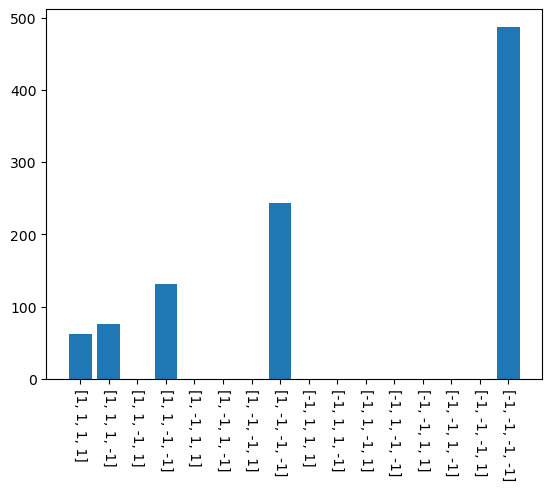

In [52]:
start = time()
dyct = {'[1, 1, 1, 1]':0, '[1, 1, 1, -1]':0, '[1, 1, -1, 1]':0, '[1, 1, -1, -1]':0,
       '[1, -1, 1, 1]':0, '[1, -1, 1, -1]':0, '[1, -1, -1, 1]':0, '[1, -1, -1, -1]':0,
       '[-1, 1, 1, 1]':0, '[-1, 1, 1, -1]':0, '[-1, 1, -1, 1]':0, '[-1, 1, -1, -1]':0,
       '[-1, -1, 1, 1]':0, '[-1, -1, 1, -1]':0, '[-1, -1, -1, 1]':0, '[-1, -1, -1, -1]':0,}

# Set Parameters
J = -0.25*np.log(0.5) # Coupling Strength
T = 1 # Temperature

# Calculate the Possibility
P = np.exp(-4 * J / T)


# Initialize the circuit
q = QuantumRegister(5)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

"""
For every loop, the program takes 3 spins from position i-1, i, and i+1 of the spins list. The program will then apply the Ising 
interaction on the spin at position i. After the ising interaction, the update spins is stored back to the spins list. The same 
process then repeated. If we don't consider the 1-dimensional ising model to be arranged in a circular shape (that is, the head spin
is not in neighbour with the tail spin), the program will apply ising interaction on all the spins except the first one and the last one.
"""


"""
In the following code, q[0] represents the spin i, q[1] represents the spins i-1, q[2] represents the spins i+1,
q[3] stands for the scratch qubit which will always be |0>, and q[4] represents the possibility to flip if change in energy is positive.
"""

n = 4

for t in range(1000):
    
    spins = [1, 1, 1, 1]
    
    for i in range (0, len(spins)):
        
        qc = QuantumCircuit(q, c)
        
        qc.u(2 * np.arccos(np.sqrt(1 - P)), 0, 0, q[4])

        if spins[i] == 1:
            qc.x(q[0])
            
        if spins[i - 1] == 1:
            qc.x(q[1])

        if spins[(i + 1) % len(spins)] == 1:
            qc.x(q[2])

        # Operation 1
        qc.mcx([q[0], q[1], q[2]], q[3]) 

        for j in range(3):
            qc.x(q[j])
        qc.mcx([q[0], q[1], q[2]], q[3])
        for j in range(3):
            qc.x(q[j])

        qc.x(q[3])
        qc.cx(q[3], q[0])
        qc.x(q[3])

        qc.ccx(q[4], q[3], q[0])

        qc.measure(q[0], c)
        backend = Aer.get_backend('qasm_simulator')
        shots = 1024
        results = execute(qc, backend, shots=shots).result()
        counts = results.get_counts()

        if len(counts.keys()) == 1:
            newstat = int(list(counts.keys())[0])
        else:
            if list(counts.values())[0] > list(counts.values())[1]:
                newstat = int(list(counts.keys())[0])
            else:
                newstat = int(list(counts.keys())[1])
        if newstat == 1:
            spins[i] = 1
        elif newstat == 0:
            spins[i] = -1

    dyct[str(spins)] = dyct[str(spins)] + 1

print(float(time() - start), 'seconds')
print(dyct)
plt.xticks(ticks = list(dyct.keys()), rotation = 315)
plt.bar(dyct.keys(), dyct.values())

#### Streaming

In [23]:
def randomindex(N):
    n = np.ceil(np.log2(N))
    tempq = QuantumRegister(n)
    tempc = ClassicalRegister(n)
    circ = QuantumCircuit(tempq, tempc)
    for numq in range(n):
        circ.h(tempq[numq])
    circ.measure(tempq, tempc)
    backend = Aer.get_backend('qasm_simulator')
    shots = 1024
    results = execute(circ, backend, shots=shots).result()
    counts = results.get_counts()
    
    
    

In [27]:
print(np.ceil(np.log2(4)))

2.0


In [28]:
def dec2bin(num):
    l = []
    if num < 0:
        return '-' + dec2bin(abs(num))
    while True:
        num, remainder = divmod(num, 2)
        l.append(str(remainder))
        if num == 0:
            return ''.join(l[::-1])

In [29]:
for i in range(8):
    print(dec2bin(i))

0
1
10
11
100
101
110
111
